In [65]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [126]:
def psd(s, nfft): 
    S = np.fft.fft(s)
    psd = np.abs(S[0:nfft*(np.size(s)//nfft)])**2 / np.size(s)**2
    psd_sum = np.sum(np.reshape(psd, (nfft, np.size(s)//nfft)), axis = 1)
    return psd_sum

In [127]:
dB = lambda v: 10*np.log10(v)

In [139]:
# Constants
k = 1.380649e-23 # J/K
T = 300 # K
N0 = k*T # dB-Hz

# Parameters
t = 10 # s
fs = 10000 # Hz
fc = fs/4 # Hz
nfft = 1000 # check influence
p_noise = N0*fs # W
p_sig = 1e-10 # W
sigma = np.sqrt(p_noise) # sqrt(W)
n = t * fs

# Signals
noise = (sigma / np.sqrt(2)) * (np.random.randn(n) + 1j*np.random.randn(n))
spur = np.sqrt(p_sig)*np.exp(2j*np.pi*fc*np.arange(0, t, 1/fs))
signal = spur + noise

In [144]:
print(f'P_noise (dBm) =  {dB(np.var(noise)):.3f}')
print(f'N0 (dBm/Hz) =  {dB(np.var(noise)/nfft):.3f}')
print(f'P_spur (dBm) =  {dB(np.var(spur)):.3f}')
print(f'C (dBm) =  {dB(np.var(spur) + np.var(noise)/nfft):.3f}')
print(f'SNR (dB) =  {dB(np.var(spur)) - dB(np.var(noise)):.3f}')
print(f'C/N0 (dB-Hz) =  {dB(np.var(spur) + np.var(noise)/nfft) - dB(np.var(noise)/nfft):.3f}')

P_noise (dBm) =  -163.849
N0 (dBm/Hz) =  -193.849
P_spur (dBm) =  -100.000
C (dBm) =  -100.000
SNR (dB) =  63.849
C/N0 (dB-Hz) =  93.849


-99.99998116638031


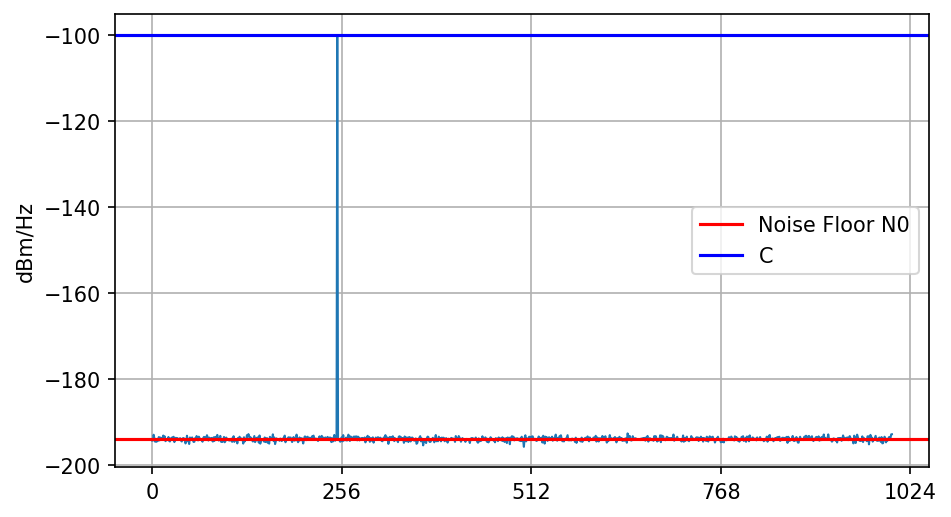

In [145]:
s = signal
plt.figure(dpi=150, figsize = (7, 4))
plt.plot(10*np.log10(psd(s, nfft)), linewidth = 1)
plt.xticks(np.arange(0, nfft+256, 256));
plt.axhline(y=dBm(np.var(noise)/nfft), c = 'red', label = 'Noise Floor N0')
plt.axhline(y=dBm(np.var(spur)), c = 'blue', label = 'C')
print(np.max(10*np.log10(psd(s, nfft))))
plt.ylabel("dBm/Hz")
plt.legend()
plt.grid()